### Project Objective:


#### To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.
### 1. Data Understanding: 10marks

In [2]:
%matplotlib inline 
%config Completer.use_jedi = False

import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns


## a. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [6]:
car_csv = pd.read_csv(r'C:\Users\Barca\Downloads\Car+name.csv')

In [7]:
car_csv

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


### b. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [12]:
car_Attributes_json = pd.read_json(r"C:\Users\Barca\Downloads\Car-Attributes-1.json")

In [14]:
car_Attributes_json

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


### c. Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [16]:
df = pd.merge(car_Attributes_json, car_csv, left_index=True, right_index=True)

In [17]:
df = df.replace('?', np.nan)

### 2. Data Preparation and Analysis: 20marks

### a. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

In [20]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Column_name': df.columns,
                                 'Percent_missing': percent_missing})
missing_value_df.sort_values('Percent_missing', inplace=True, ascending=False)

print(missing_value_df)

percent_missing = df.isnull().sum() 
missing_value_df = pd.DataFrame({'Column_name': df.columns,
                                 'No.of.Missing_values': percent_missing})

missing_value_df.sort_values('No.of.Missing_values', inplace=True, ascending=False)
print("\n", missing_value_df)

         Column_name  Percent_missing
hp                hp         1.507538
mpg              mpg         0.000000
cyl              cyl         0.000000
disp            disp         0.000000
wt                wt         0.000000
acc              acc         0.000000
yr                yr         0.000000
origin        origin         0.000000
car_name    car_name         0.000000

          Column_name  No.of.Missing_values
hp                hp                     6
mpg              mpg                     0
cyl              cyl                     0
disp            disp                     0
wt                wt                     0
acc              acc                     0
yr                yr                     0
origin        origin                     0
car_name    car_name                     0


In [21]:
df['hp'] = df['hp'].astype('float64') # Converting it to float

In [22]:
# Dropping categorical columns and replacing nan values with median and joining with numeric columns

numeric_cols = df.drop('car_name', axis=1)
car_names = pd.DataFrame(df[['car_name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### b. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

In [23]:
dups = df.duplicated()
print(dups.sum())

# There are no duplicate values in the df.

0


In [24]:
df['dispercyl'] = df['disp'] / df['cyl']

### c. Plot a pairplot for all features. [1 Marks]

In [ ]:
c. Plot a pairplot for all features. [1 Marks]

In [25]:
import warnings
warnings.filterwarnings("ignore")

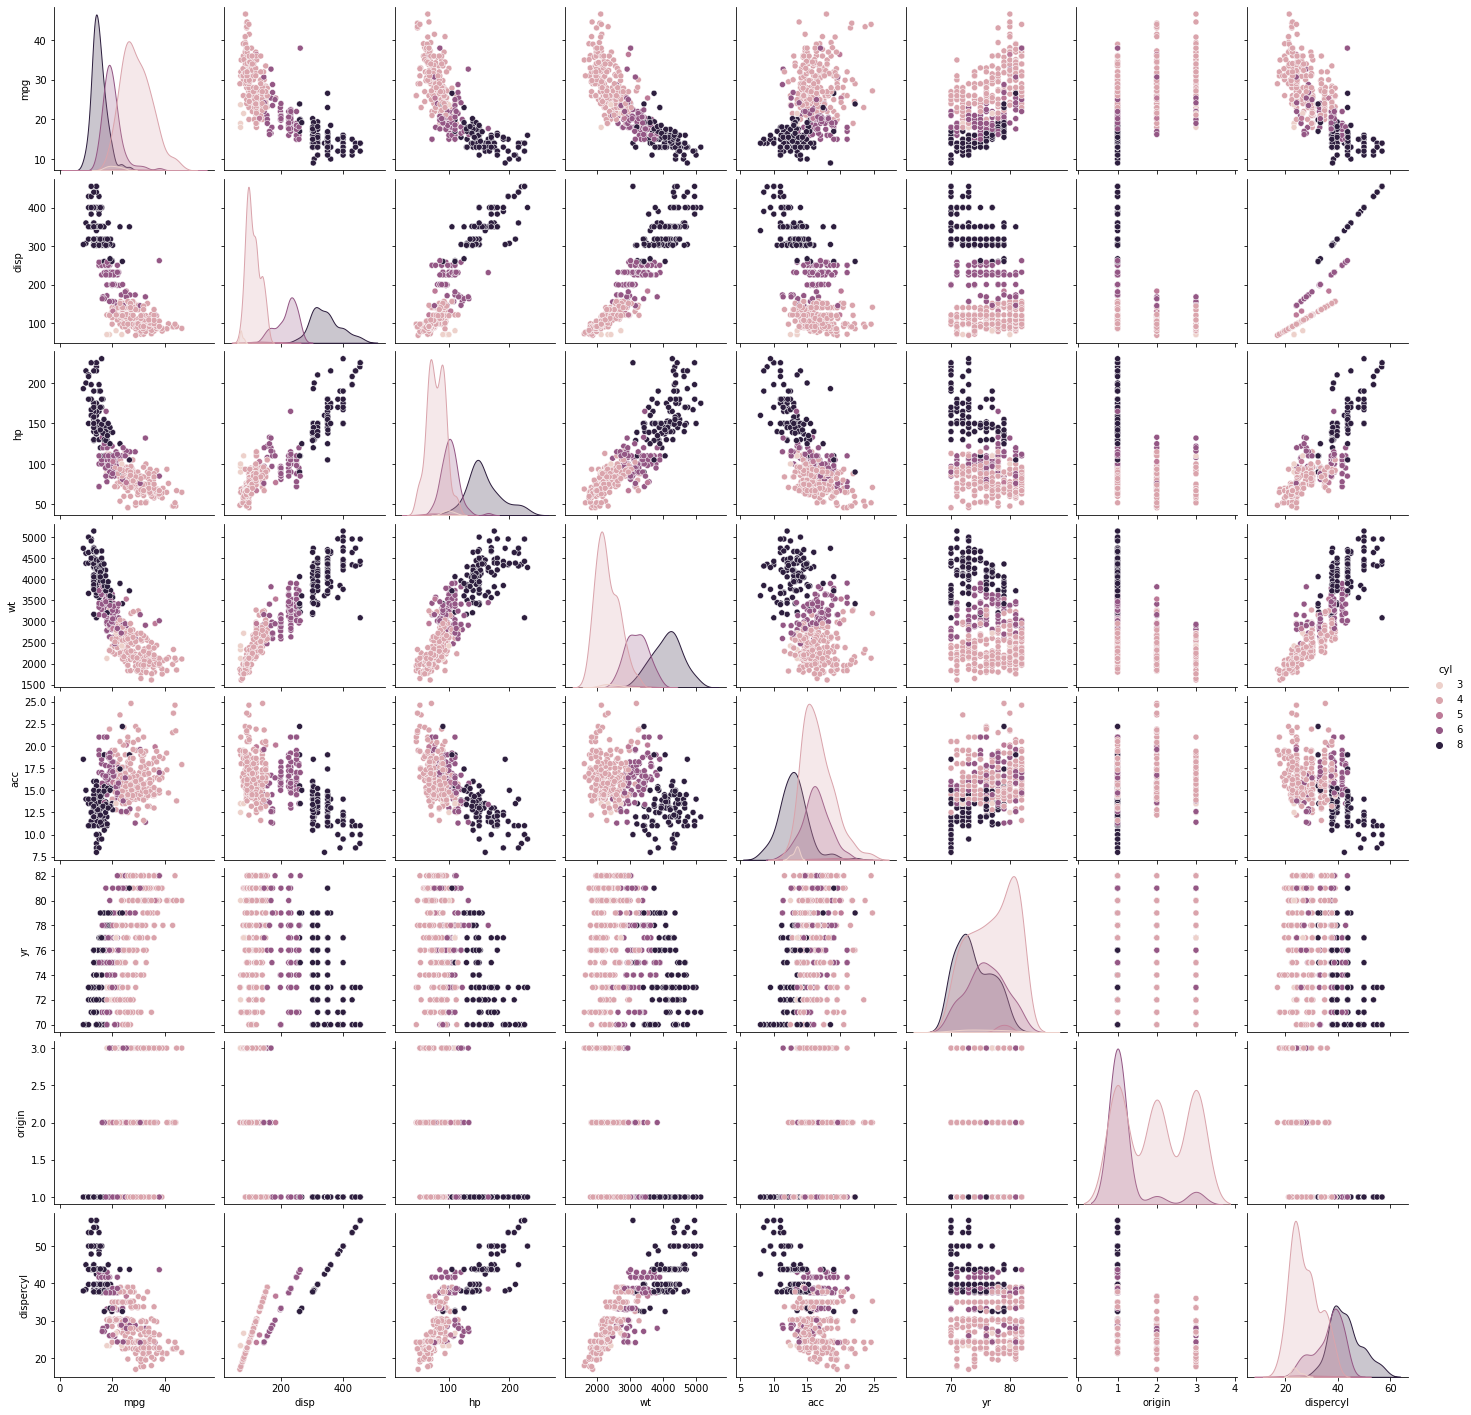

In [26]:
sns.pairplot(df, diag_kind='kde', hue = "cyl")

### d. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

[None]

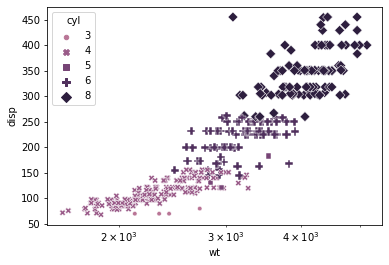

In [30]:
g =sns.scatterplot(x = df["wt"], y = df["disp"], hue = df["cyl"], data = df, 
                   style = df["cyl"], size=df["cyl"],
                   sizes=(20, 100), hue_norm=(0, 7),legend='full')
g.set(xscale="log")

### e. Share insights for Q2.d. [1 Marks]

In [ ]:
✔ For cylinder 4 there are around 204 cars which are mostly may be sedan types but it gets mixed with some cylinders like 5 and 6 mostly the cylinder 5 cars come inside cylinder 4 cars.
✔For cylinder 6 there are around 84 cars and these cars are like top model cars. Some of these cars have weight and displacement similar to cars with cylinder 4 and cylinder 8. These cars may be outliers.
✔For cylinder 8 there are around 103 cars which are high-end cars. There seems to be too much variance in this cylinder. The performance is not good.

### f. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

[None]

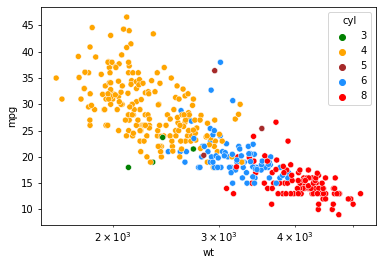

In [31]:
g1 =sns.scatterplot(x = df["wt"], y = df["mpg"], hue = df["cyl"], data = df,
                  palette=['green','orange','brown','dodgerblue','red'], legend='full')
g1.set(xscale="log")

### g. Share insights for Q2.f. [1 Marks]

In [ ]:
✔ From the scatterplot we can say that there are 3 natural clusters. It follows an inverse linear relationship.
✔ Cars with cylinder 3 (Mazda rx2 coupe, Mazda rx3, Mazda RX-4, Mazda RX-7 gs) and 5 (Audi 5000, Mercedes Benz 300d, Audi 5000s (diesel)) are like special cars which come inside cylinder 4 and 6.
✔ Cars with cylinder 4 are normal sedan types used for daily activity. It has too much variance. In this plot, cylinder 4 shows poor performance.

### h. Check for unexpected values in all the features and datapoints with such values. [2 Marks]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpg        398 non-null    float64
 1   cyl        398 non-null    int64  
 2   disp       398 non-null    float64
 3   hp         398 non-null    float64
 4   wt         398 non-null    int64  
 5   acc        398 non-null    float64
 6   yr         398 non-null    int64  
 7   origin     398 non-null    int64  
 8   car_name   398 non-null    object 
 9   dispercyl  398 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 31.2+ KB


In [34]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Column_name': df.columns,
                                 'Percent_missing': percent_missing})
missing_value_df.sort_values('Percent_missing', inplace=True, ascending=False)

print(missing_value_df)

          Column_name  Percent_missing
mpg               mpg              0.0
cyl               cyl              0.0
disp             disp              0.0
hp                 hp              0.0
wt                 wt              0.0
acc               acc              0.0
yr                 yr              0.0
origin         origin              0.0
car_name     car_name              0.0
dispercyl   dispercyl              0.0


### Clustering: 30marks

In [35]:
df1 = df.copy()

### a. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

In [36]:
df1["origin"].unique()

array([1, 3, 2], dtype=int64)

In [37]:
from scipy.stats import zscore

df1_attr = df1.loc[:, 'mpg':'origin']
df1_attr_z = df1_attr.apply(zscore)
df2_attr_z = df1_attr_z # Removing unnecessary columns from data frame.

df2_attr_z.pop('origin')
df2_attr_z.pop('yr')
df2_attr_z.pop('acc')

0     -1.295498
1     -1.477038
2     -1.658577
3     -1.295498
4     -1.840117
         ...   
393    0.011586
394    3.279296
395   -1.440730
396    1.100822
397    1.391285
Name: acc, Length: 398, dtype: float64

In [38]:
cluster_range = range(2, 11)   
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(df1_attr_z)
    clusters.fit(df2_attr_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df1 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df1

,num_clusters,cluster_errors
0,2,635.864292
1,3,353.663382
2,4,254.075489
3,5,204.098549
4,6,182.874407
5,7,165.780353
6,8,152.504976
7,9,141.095452
8,10,131.977420


In [39]:
cluster_range = range(2, 11)   
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(df2_attr_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df2 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df2

,num_clusters,cluster_errors
0,2,635.864292
1,3,353.663382
2,4,254.075489
3,5,204.098549
4,6,182.932000
5,7,165.746287
6,8,152.500474
7,9,144.851771
8,10,131.251870


### b. Plot a visual and find elbow point. [2 Marks]

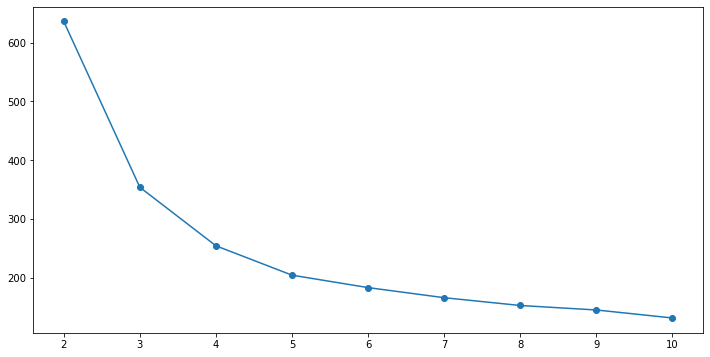

In [40]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df2.num_clusters, clusters_df2.cluster_errors, marker = "o" )

In [41]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
  
for k in range(2, 10):
    cluster = KMeans(n_clusters=k, init='k-means++')
    cluster.fit(df2_attr_z)
    score = silhouette_score(df2_attr_z, cluster.labels_)
    silhouette_coefficients.append(score)

In [42]:
silhouette_coefficients

[0.5663311483392786,
 0.5186527176589687,
 0.462160326802916,
 0.4336225547767739,
 0.37575915738297516,
 0.3340451447451973,
 0.31143862518449467,
 0.30748719833443133]

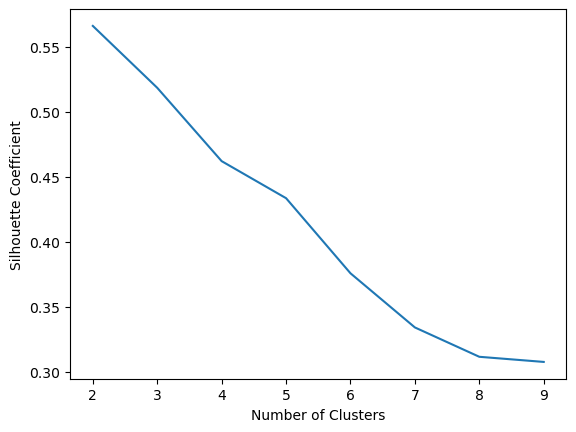

In [43]:
plt.style.use("default")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [44]:
# With K = 3
cluster = KMeans( n_clusters = 3, random_state = 100 )
cluster.fit(df2_attr_z)
df2_attr_z_copy = df2_attr_z.copy(deep = True)  
# Creating a mirror copy for later re-use instead of building repeatedly

centroids = cluster.cluster_centers_

centroid_df = pd.DataFrame(centroids, columns = list(df2_attr_z) )

prediction=cluster.predict(df2_attr_z)
df2_attr_z["GROUP"] = prediction 

array([[<AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

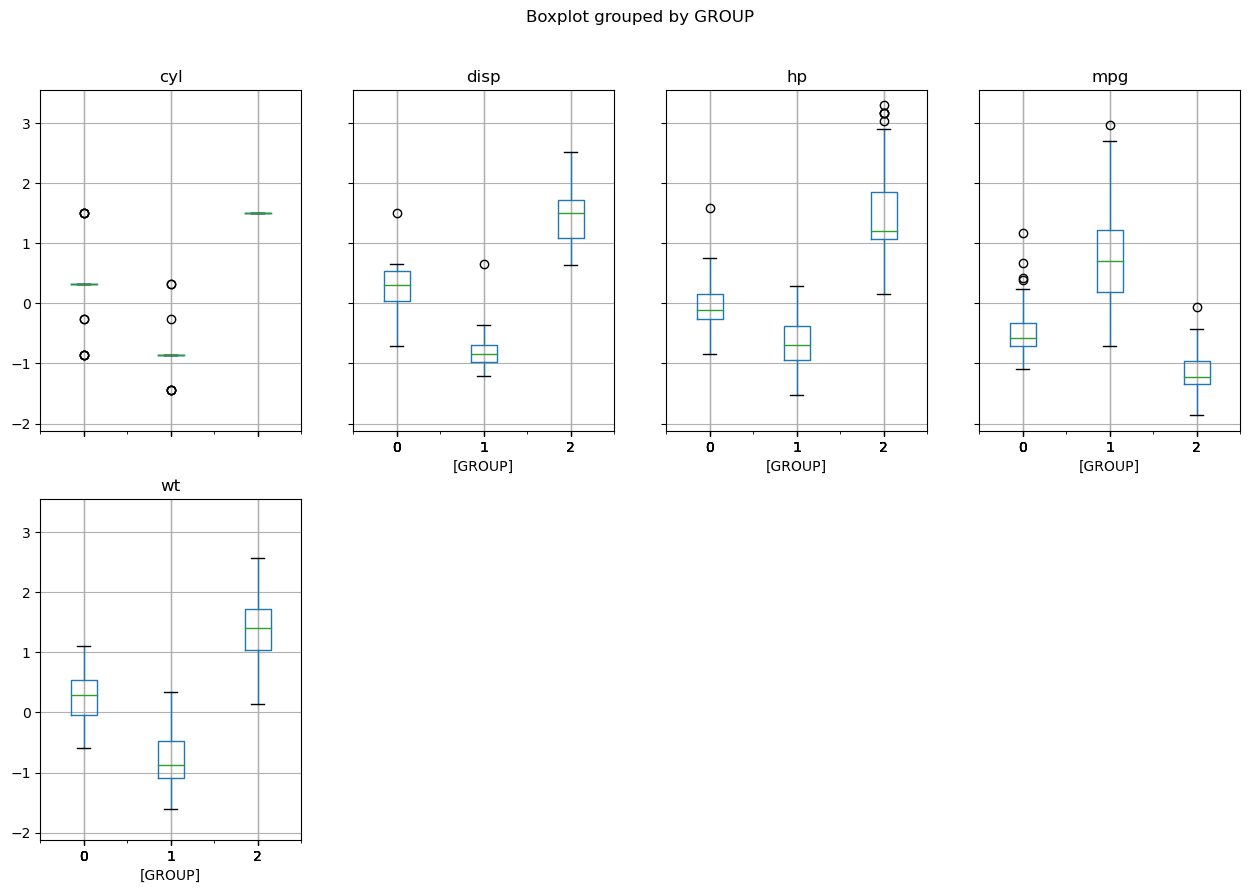

In [46]:
import matplotlib.pylab as plt

df2_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [47]:
# With K = 4
cluster = KMeans( n_clusters = 4, random_state = 100 )
cluster.fit(df2_attr_z)
df2_attr_z_copy = df2_attr_z.copy(deep = True)  
# Creating a mirror copy for later re-use instead of building repeatedly

centroids = cluster.cluster_centers_

centroid_df = pd.DataFrame(centroids, columns = list(df2_attr_z) )

prediction=cluster.predict(df2_attr_z)
df2_attr_z["GROUP"] = prediction 

array([[<AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

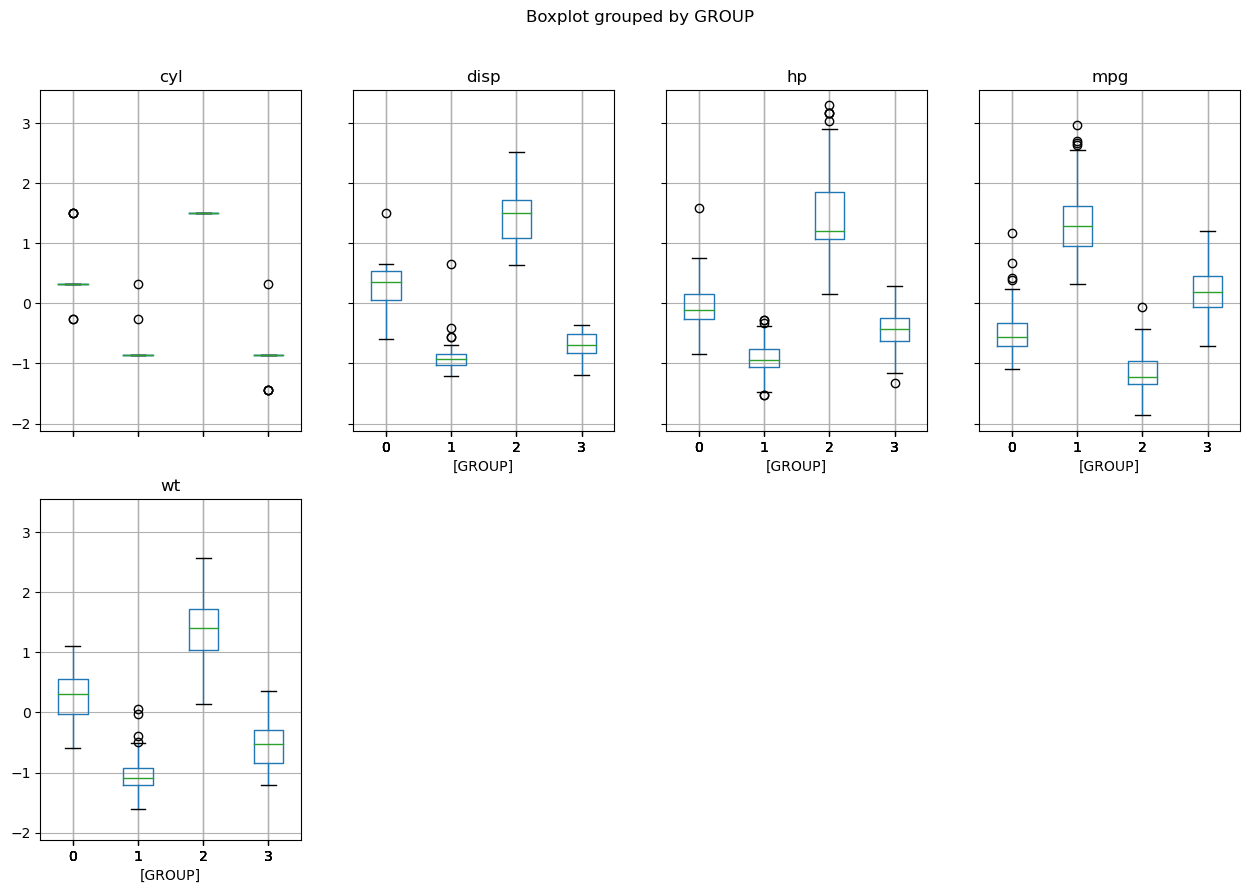

In [49]:
import matplotlib.pylab as plt
df2_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

### c. On the above visual, highlight which are the possible Elbow points. [1 Marks]

In [ ]:
✔ The possible elbow points are with k = 3 and k = 4. Because there is significance drop from K = 2 to K = 3, but there is less drop in K = 4 compared to K = 3. Also the silhouette score for 3 > 4. So k = 3. Also in box plot K=3 separates well than k = 4

### d. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

In [51]:
# With K = 3
cluster = KMeans( n_clusters = 3, random_state = 100 )
cluster.fit(df2_attr_z)
df2_attr_z_copy = df2_attr_z.copy(deep = True)  

In [52]:
df2_attr_z.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'GROUP'], dtype='object')

### e. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

In [53]:
centroids = cluster.cluster_centers_

centroid_df = pd.DataFrame(centroids, columns = list(df2_attr_z) )

prediction=cluster.predict(df2_attr_z)
df2_attr_z["GROUP"] = prediction 

In [54]:
df2_attr_z["GROUP"].unique()

array([0, 1, 2])

In [55]:
df3 = df2_attr_z   
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (df3.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df3['GROUP']))

array([[<AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

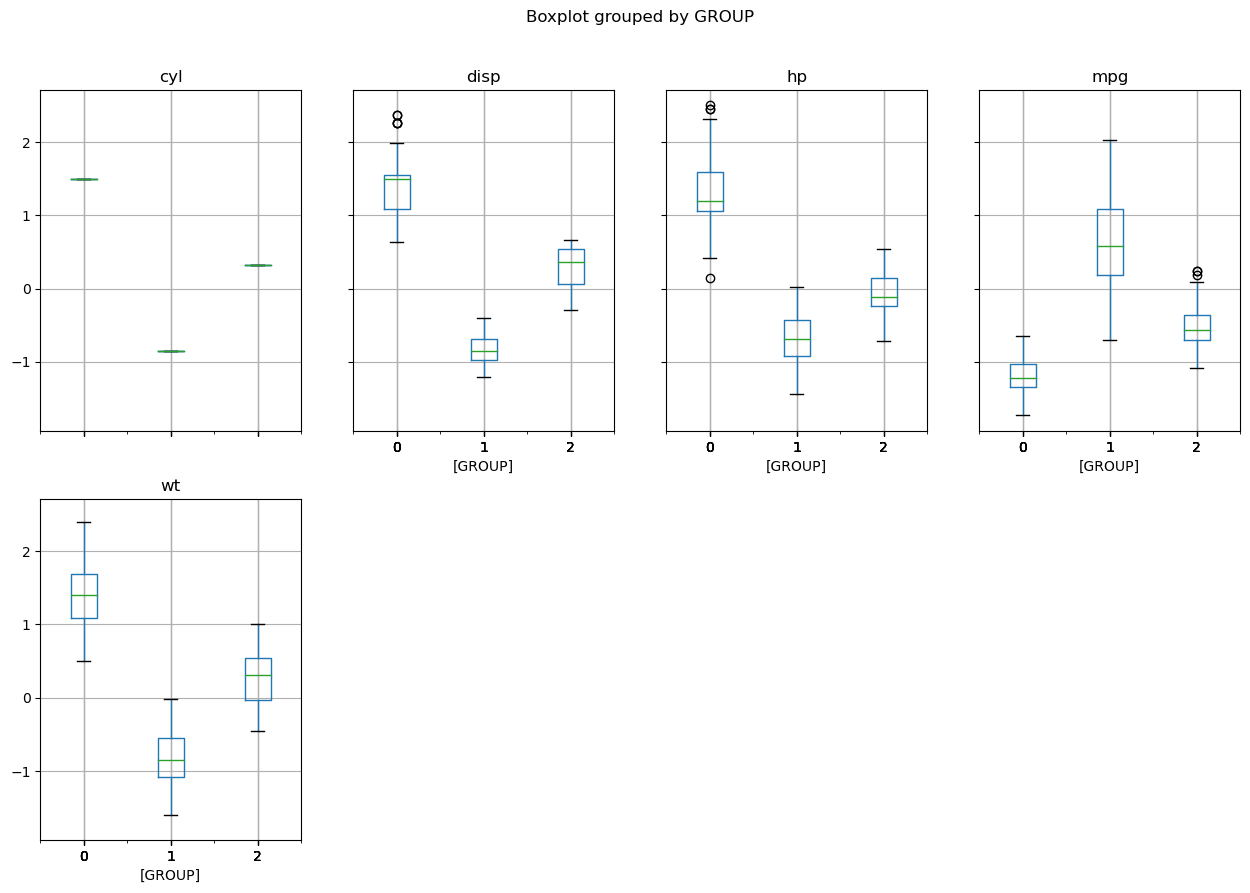

In [56]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

In [57]:
df4 =concat_data.copy()

In [58]:
df4["GROUP"].value_counts()

1    211
0     99
2     88
Name: GROUP, dtype: int64

### f. Plot a visual and color the datapoints based upon clusters. [2 Marks]

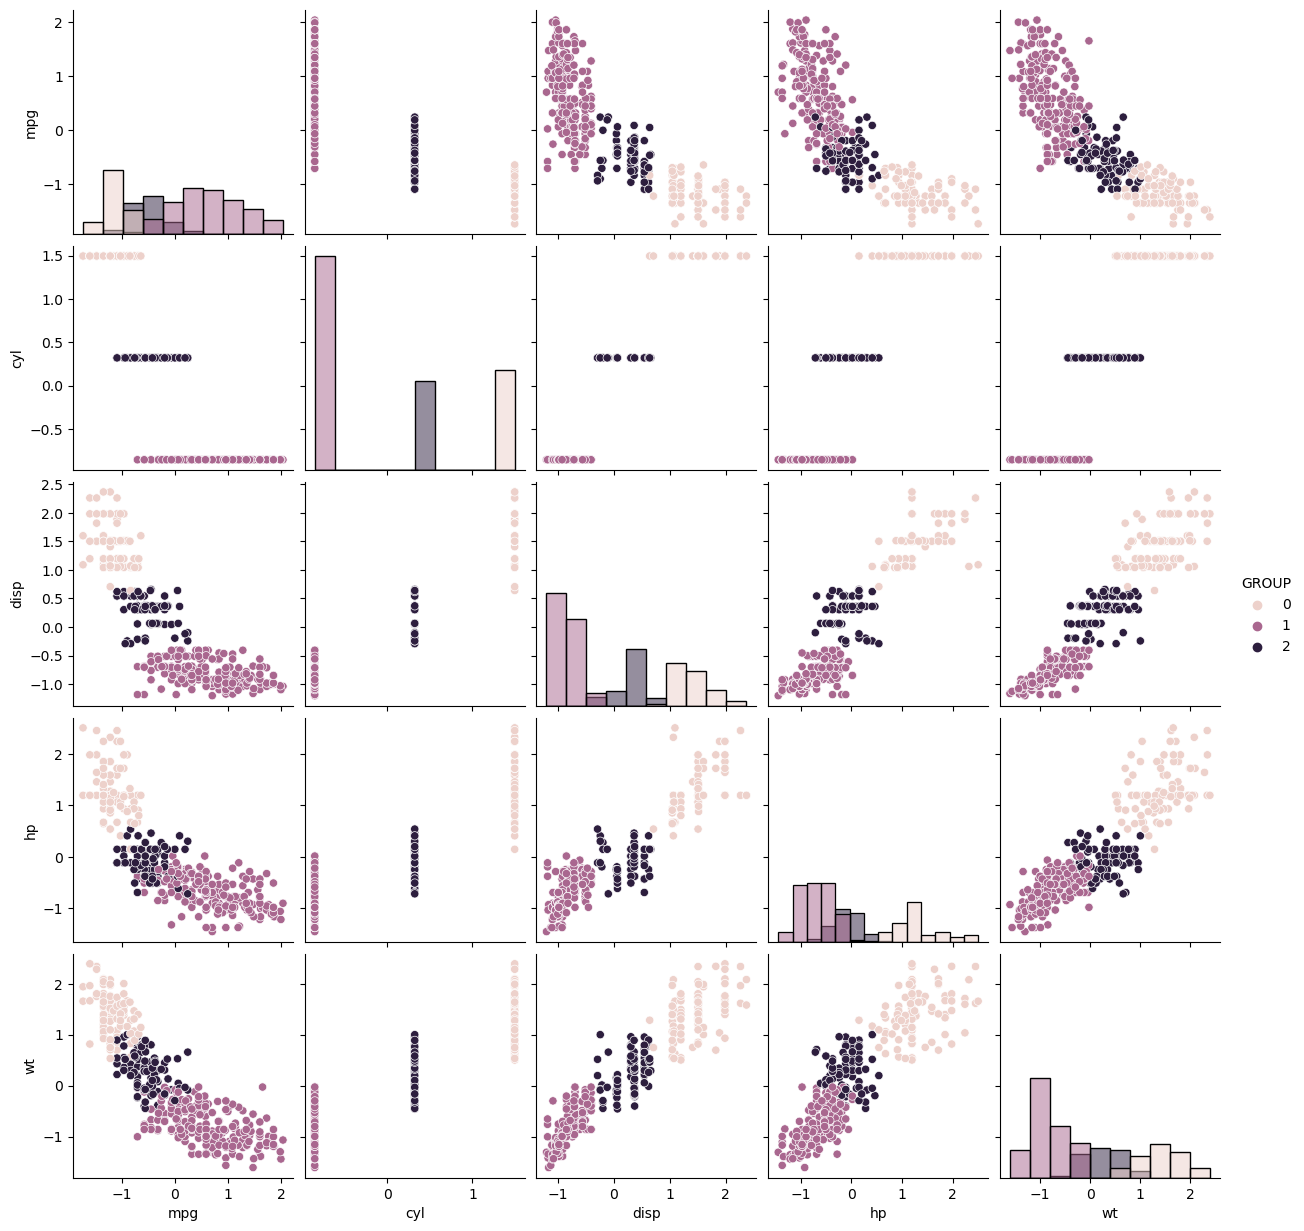

In [59]:
sns.pairplot(df4, diag_kind = "hist",  hue = "GROUP")

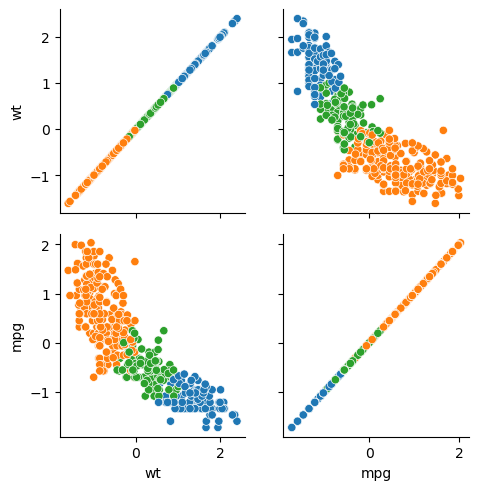

In [60]:
g = sns.PairGrid(df4, vars = ["wt", "mpg"], hue = "GROUP", palette = "tab10")
g.map(sns.scatterplot)

### g. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [61]:
mpg = [42.34, 59.51, 51.2]
cyl = [5, 3, 4]
hp = [100, 37, 81]
disp = [1493, 624, 1197]
wt = [3306, 1763, 1851]
carname = ["kia_seltos", "nano", "Maruthi wagon r"]

x = pd.DataFrame({'mpg': mpg, "cyl":cyl, "disp":disp, "hp":hp, "wt":wt})
df_final = df4.copy(deep = True)
df_final = df4.loc[:, 'mpg':'wt']

x = x.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 100 )
cluster.fit(df_final)  
predict_test = cluster.predict(x)

print(predict_test)

[0 1 2]


In [62]:
x = df4.head(5)

x = x.drop("GROUP", axis = 1)

df_final = df4.copy(deep = True)
df_final = df4.loc[:, 'mpg':'wt']


cluster = KMeans( n_clusters = 3, random_state = 100 )
cluster.fit(df_final)  
predict_test = cluster.predict(x)

print(predict_test)

[0 0 0 0 0]
